<a href="https://colab.research.google.com/github/Janeli-m/Kickstarter_1_1_/blob/main/Kickstarter_1_1_Janeli_Murillo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
# import librarys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
import numpy as np
import plotly.graph_objects as go
from collections import OrderedDict
import time


%matplotlib inline
import datetime as dt
from matplotlib.gridspec import GridSpec
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler as ss


In [ ]:
df = pd.read_excel ('/content/kickstarter-1-1.xlsx')
df.head()

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4114 entries, 0 to 4113
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         4114 non-null   int64  
 1   name                       4114 non-null   object 
 2   blurb                      4113 non-null   object 
 3   goal                       4114 non-null   float64
 4   pledged                    4114 non-null   float64
 5   state                      4114 non-null   object 
 6   country                    4114 non-null   object 
 7   currency                   4114 non-null   object 
 8   deadline                   4114 non-null   int64  
 9   launched_at                4114 non-null   int64  
 10  staff_pick                 4114 non-null   bool   
 11  backers_count              4114 non-null   int64  
 12  spotlight                  4114 non-null   bool   
 13  Category and Sub-Category  4114 non-null   objec

# Data Cleaning 

In [151]:
# check whether there are any null values
df.isnull().sum()

id                           0
name                         0
blurb                        1
goal                         0
pledged                      0
state                        0
country                      0
currency                     0
deadline                     0
launched_at                  0
staff_pick                   0
backers_count                0
spotlight                    0
Category and Sub-Category    0
Continent                    0
dtype: int64

In [152]:
df = df.dropna()

In [153]:
# confirm there are no more null values
df.isnull().sum()

id                           0
name                         0
blurb                        0
goal                         0
pledged                      0
state                        0
country                      0
currency                     0
deadline                     0
launched_at                  0
staff_pick                   0
backers_count                0
spotlight                    0
Category and Sub-Category    0
Continent                    0
dtype: int64

In [154]:
#next step would be to check if our dataset has any duplicated values

In [155]:
dup_id = df['id'].duplicated() == True

In [156]:
dup_id.sum()

0

There are no duplicates

# Data Pre-processing

In [157]:
# convert "deadline" and "launched_at" to date time 

In [158]:
df['deadline'] = pd.to_datetime(df['deadline'], unit='s')
df['launched_at'] = pd.to_datetime(df['launched_at'], unit='s')


In [159]:
# added the quarter
df['quarter'] = df['launched_at'].dt.quarter

In [160]:
# create column with the length of the campaigns in days which will help us in analysis

In [161]:
#df['deadline'] - df['launched_at']
df['campaign span days'] = (df['deadline'] - df['launched_at']).dt.days

In [162]:
# extract year  which will help us in analysis
df['launched year'] = df['launched_at'].dt.year

In [163]:
df.country.unique()

array(['US', 'GB', 'AU', 'ES', 'NZ', 'CA', 'FR', 'HK', 'DK', 'NL', 'NO',
       'SE', 'DE', 'IT', 'MX', 'AT', 'CH', 'IE', 'BE', 'LU', 'SG'],
      dtype=object)

In [164]:
df.Continent.unique()

array(['North America', 'Europe', 'Australia', 'Asia'], dtype=object)

In [165]:
# separate Category and Sub-Category into two columns
df[['Category', 'Sub-Category']] = df['Category and Sub-Category'].str.split('/', expand=True)
df.head()

,id,name,blurb,goal,pledged,state,country,currency,deadline,launched_at,staff_pick,backers_count,spotlight,Category and Sub-Category,Continent,quarter,campaign span days,launched year,Category,Sub-Category
0,0,GIRLS STATE a new musical comedy TV project,"In this new TV show ""All Politics is Vocal"" as...",8500.0,11633.00,successful,US,USD,2015-07-23 03:00:00,2015-06-22 00:10:11,False,182,True,film & video/television,North America,2,31,2015,film & video,television
1,1,FannibalFest Fan Convention,A Hannibal TV Show Fan Convention and Art Coll...,10275.0,14653.00,successful,US,USD,2017-03-02 14:24:43,2017-01-31 14:24:43,False,79,True,film & video/television,North America,1,30,2017,film & video,television
2,2,Charlie teaser completion,Completion fund for post-production for teaser...,500.0,525.00,successful,GB,GBP,2016-02-15 16:51:23,2016-02-05 16:51:23,False,35,True,film & video/television,Europe,1,10,2016,film & video,television
3,3,Unsure/Positive: A Dramedy Series About Life w...,We already produced the *very* beginning of th...,10000.0,10390.00,successful,US,USD,2014-08-07 12:21:47,2014-07-08 12:21:47,False,150,True,film & video/television,North America,3,30,2014,film & video,television
4,4,Party Monsters,19th centuryâ€™s most notorious literary chara...,44000.0,54116.28,successful,US,USD,2015-12-19 20:01:19,2015-11-19 20:01:19,False,284,True,film & video/television,North America,4,30,2015,film & video,television


In [166]:
df.Category.unique()

array(['film & video', 'theater', 'technology', 'publishing', 'music',
       'journalism', 'games', 'food', 'photography'], dtype=object)

# Data Analysis 

# Data from all over the world 

Now we kind of have a proper cleaned dataset we can start analysing our data and visualizing those results


In [167]:
cat_values = df['Category'].value_counts()
cat_values

theater         1392
music            700
technology       600
film & video     520
publishing       237
games            220
photography      220
food             200
journalism        24
Name: Category, dtype: int64

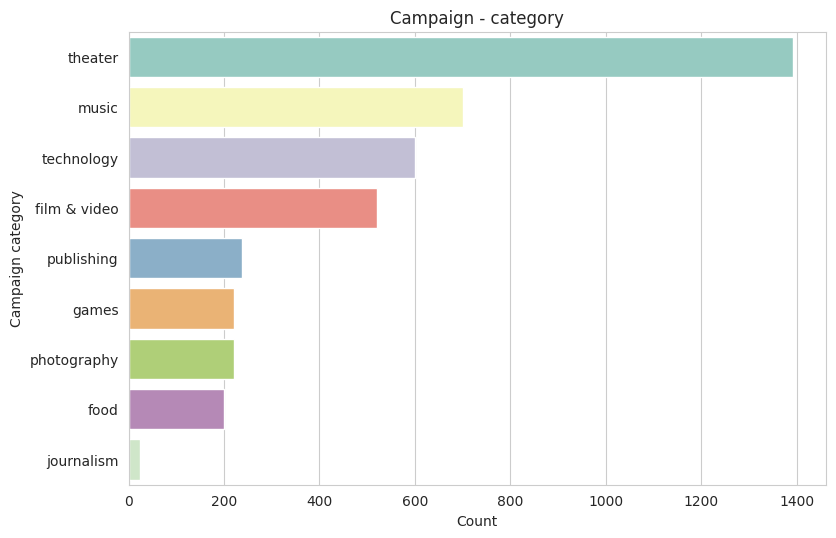

In [168]:
sns.set_style('whitegrid')
plt.figure(figsize=(9,6),dpi=100)
cat_values = df['Category'].value_counts()

sns.barplot(data=df,x=cat_values.values,y=cat_values.index)

plt.xlabel('Count')
plt.ylabel('Campaign category')
plt.title('Campaign - category');

**Theater** seems to the most popular Kickstarter campaign


In [169]:
#Lets have a look on the sub categories also
sub_cat = df['Sub-Category'].value_counts()
sub_cat = sub_cat.nlargest(15)

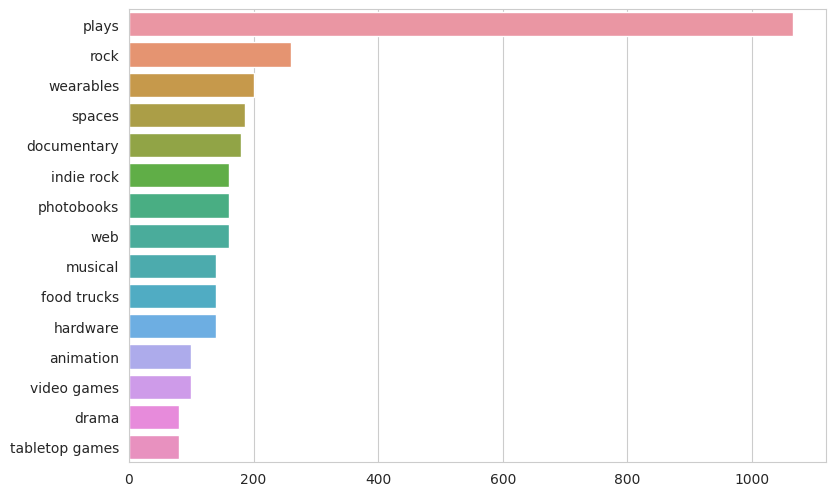

In [170]:
plt.figure(figsize=(9,6),dpi=100)

sns.barplot(x=sub_cat.values,y=sub_cat.index)

In [171]:
df[df['Sub-Category'] == 'plays']

,id,name,blurb,goal,pledged,state,country,currency,deadline,launched_at,staff_pick,backers_count,spotlight,Category and Sub-Category,Continent,quarter,campaign span days,launched year,Category,Sub-Category
520,520,Darktales The Play,Tim Arthur's 21st anniversary sell-out product...,5000.0,5105.00,successful,GB,GBP,2015-12-10 16:51:01,2015-11-10 16:51:01,False,34,True,theater/plays,Europe,4,30,2015,theater,plays
521,521,"U.S. Premiere of ""dirty butterfly"" by debbie t...",The Blind Owl in co-production with Halcyon Th...,5000.0,5232.00,successful,US,USD,2016-11-01 04:59:00,2016-10-03 02:13:39,False,56,True,theater/plays,North America,4,29,2016,theater,plays
522,522,COMPASS PLAYERS,*** TO MAKE DONATIONS IN THE FUTURE ...,3000.0,3440.00,successful,US,USD,2016-03-20 23:58:45,2016-03-01 00:58:45,False,31,True,theater/plays,North America,1,19,2016,theater,plays
523,523,"""The Star on My Heart"" Original Play Project o...","The Star on My Heart, an original play based o...",5000.0,6030.00,successful,US,USD,2015-09-21 03:11:16,2015-08-22 03:11:16,False,84,True,theater/plays,North America,3,30,2015,theater,plays
524,524,Zero Down,Angel on the Corner need YOUR help to raise Â£...,3500.0,3803.55,successful,GB,GBP,2016-06-01 17:12:49,2016-05-02 17:12:49,False,130,True,theater/plays,Europe,2,30,2016,theater,plays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4109,4109,Jack the Lad,Jack the Lad - a new play that explores how fa...,500.0,0.00,failed,GB,GBP,2015-11-29 13:56:44,2015-10-30 12:56:44,False,0,False,theater/plays,Europe,4,30,2015,theater,plays
4110,4110,Take Tartuffe to Edinburgh Fringe Festival!,"Set in the height of sex, drugs and rock 'n' r...",300.0,86.00,failed,GB,GBP,2016-07-21 15:02:31,2016-05-22 15:02:31,False,6,False,theater/plays,Europe,2,60,2016,theater,plays
4111,4111,REBORN IN LOVE,REBORN IN LOVE is the sequel to REBORN FROM AB...,3000.0,94.00,failed,US,USD,2015-02-24 03:15:40,2015-01-25 03:15:40,False,6,False,theater/plays,North America,1,30,2015,theater,plays
4112,4112,"A Great New Controversial Play - ""The Divide"".",Set in Southern America â€œThe Divideâ€ is a ...,2500.0,1.00,failed,IE,EUR,2016-02-28 00:00:00,2016-01-31 22:43:06,False,1,False,theater/plays,Europe,1,27,2016,theater,plays


**Plays** *sub category* form theater turn out to be the one with most num. campaign with 1066 campaigns


In [172]:
df['launched year'].value_counts()


2015    1224
2014     976
2016     950
2012     282
2013     274
2011     171
2017     157
2010      65
2009      14
Name: launched year, dtype: int64

The continent having the most num. of kickstarter campaings is North America with 3195 campaigns


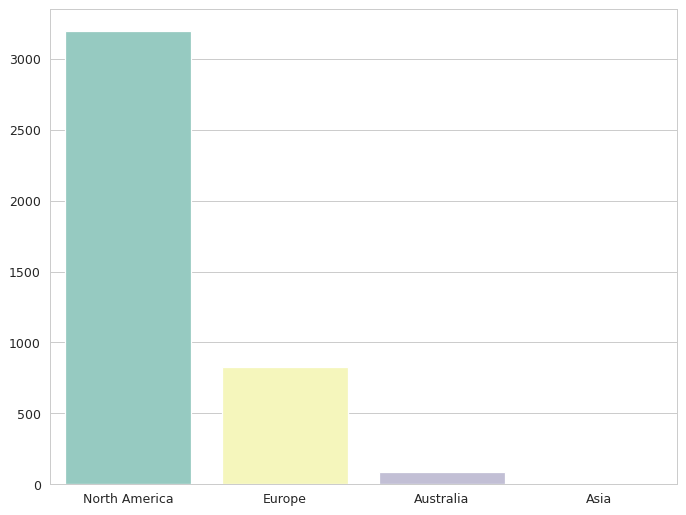

In [173]:
# lets have a look at the continent distribution

continent = df['Continent'].value_counts()
plt.figure(figsize=(9,7),dpi=90)

sns.barplot(y=continent.values,x=continent.index)

print('The continent having the most num. of kickstarter campaings is',continent.index[0],'with',continent.values[0],'campaigns')

The most used currency for pledging is:- USD


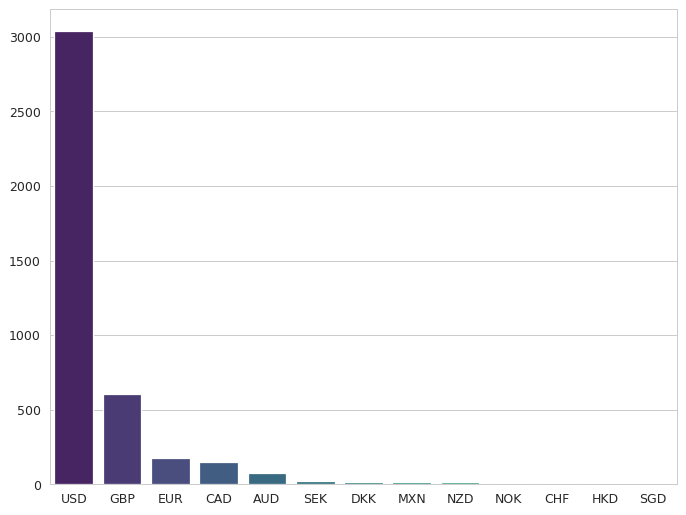

In [174]:
#lets have a look on the currency distribution
curr = df['currency'].value_counts()
plt.figure(figsize=(9,7),dpi=90)
sns.barplot(y=curr.values,x=curr.index,palette='viridis')

print('The most used currency for pledging is:-',curr.index[0])

In [175]:
# most pledged compaign in the world 
most_pledged_status = df[df['state'] == 'successful']
most_pledged = most_pledged_status.groupby('Category')['pledged'].sum().to_frame().reset_index().sort_values('pledged', ascending = False).head(30).set_index('Category')
most_pledged.head()

,pledged
Category,
technology,19665020.16
film & video,5313576.17
theater,5115585.38
music,3147611.64
games,2791408.56


**Technology** is the most plaged campaign in the world

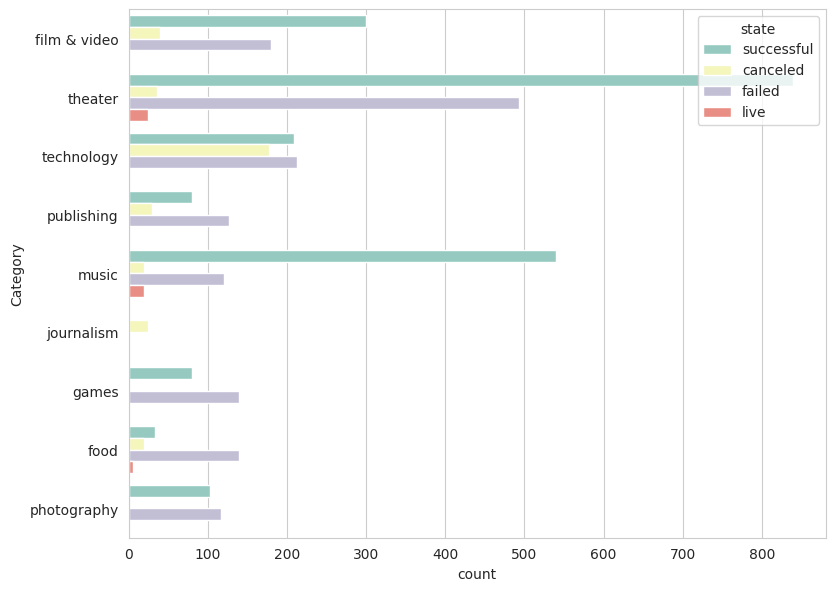

In [176]:
#success rate of campaigns

plt.figure(figsize=(9,7),dpi=100)

sns.countplot(data=df,y='Category',hue='state')

All over the world **theater** is most successful category and also seems to be most failed. 

## Data from Europe

In [177]:
success_projects = df[df['state'] == 'successful']

In [178]:
eu_success_ks = success_projects[success_projects['Continent'] == 'Europe']


In [179]:
eu_success_ks.head()

,id,name,blurb,goal,pledged,state,country,currency,deadline,launched_at,staff_pick,backers_count,spotlight,Category and Sub-Category,Continent,quarter,campaign span days,launched year,Category,Sub-Category
2,2,Charlie teaser completion,Completion fund for post-production for teaser...,500.0,525.0,successful,GB,GBP,2016-02-15 16:51:23,2016-02-05 16:51:23,False,35,True,film & video/television,Europe,1,10,2016,film & video,television
15,15,Cien&Cia,Cien&Cia es un proyecto transmedia para televi...,2000.0,2132.0,successful,ES,EUR,2015-09-27 20:14:00,2015-09-09 09:24:18,False,98,True,film & video/television,Europe,3,18,2015,film & video,television
17,17,Humble Pie,"Uplifting English sitcom, a love letter to you...",1500.0,1510.0,successful,GB,GBP,2014-11-04 18:33:42,2014-10-05 17:33:42,False,36,True,film & video/television,Europe,4,30,2014,film & video,television
29,29,The JOB Prelude.,"Genuine, no cliche Cop dramedy. Stories based ...",3000.0,3700.0,successful,GB,GBP,2014-07-22 16:09:28,2014-06-22 16:09:28,False,117,True,film & video/television,Europe,2,30,2014,film & video,television
39,39,Deep Cuts - Series,Mystery-Drama Series. Following a shocking eve...,25000.0,32745.0,successful,GB,GBP,2014-05-25 22:59:00,2014-04-25 01:07:48,False,217,True,film & video/television,Europe,2,30,2014,film & video,television


In [180]:
eu_success_ks['launched year'].value_counts()


2015    167
2016    149
2014     93
2013     18
2017     17
2012      3
Name: launched year, dtype: int64

In [181]:
eu_success_ks['quarter'].value_counts()

2    154
1    111
3     92
4     90
Name: quarter, dtype: int64

Most of the successfull projects in Europe were launched in the 2015
Most of the successfull projects in Europe quarter was Q2




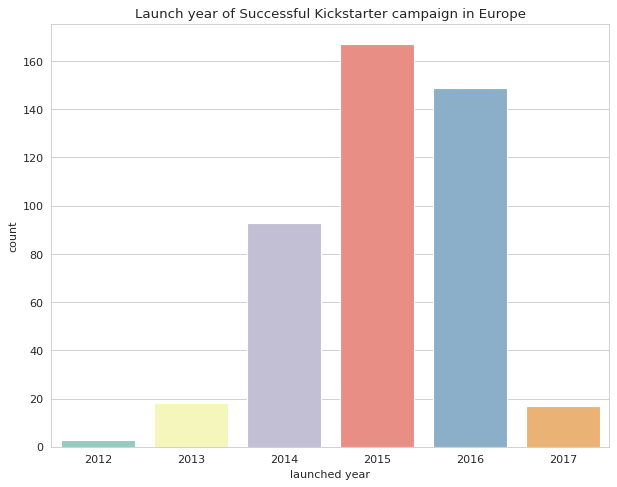

In [182]:
plt.figure(figsize=(9,7),dpi=80)

sns.countplot(data=eu_success_ks,x='launched year')

plt.title('Launch year of Successful Kickstarter campaign in Europe');

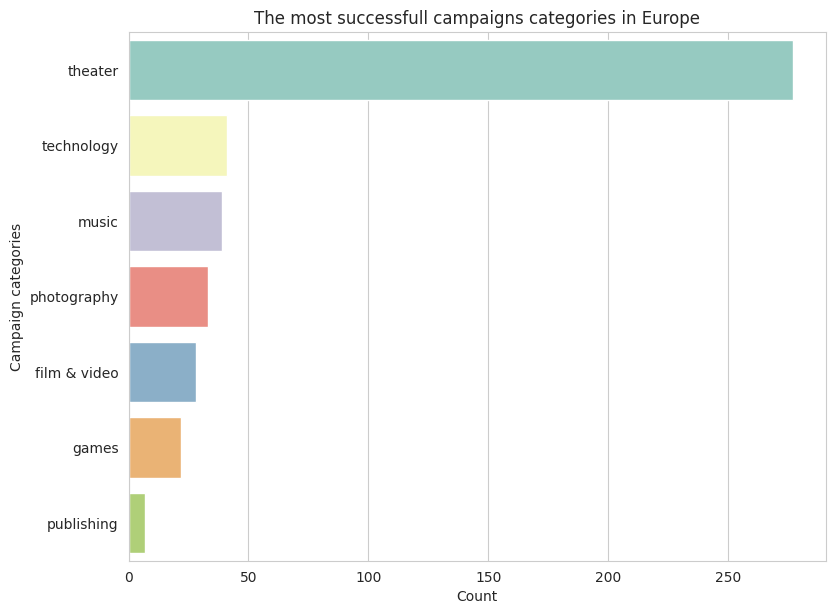

In [183]:
# Most successful category of KS campaigns in EU
plt.figure(figsize=(9,7),dpi=100)
eu_s_cat = eu_success_ks['Category'].value_counts()
sns.barplot(x=eu_s_cat.values,y=eu_s_cat.index)

plt.xlabel('Count')
plt.ylabel('Campaign categories')
plt.title('The most successfull campaigns categories in Europe');

In [184]:
only_success_status = df[df['state'] == 'successful']
only_success_status_EU = only_success_status[only_success_status['Continent'] == 'Europe']
most_pledged_cat_EU = only_success_status_EU.groupby('Category')['pledged'].sum().to_frame().reset_index().sort_values('pledged', ascending = False).head(30).set_index('Category')
most_pledged_cat_EU.head()

,pledged
Category,
technology,4691972.73
photography,901226.03
theater,844515.99
games,593569.23
film & video,244254.43


Though theater happens to be the main category with most successful campaigns, Technology has racked in more donations so funding wise in EU technology is most successful camapigns and theater is the most successful category with higher number of successful campaigns.
But success of any campaign if defined by whether it reached its funding goal so in that manner theater remains the top successful category of KS campaigns in EU.
The reason technology being funded more can be because having the most developed country in the world, EU has always been the parent of technology driven products, maybe that is why it is funded more

In [185]:
#Goal and amount pledged per category (for non-US)
kick_df_goal = df[(df['launched year'] ) & (df.Continent == 'Europe') & (df.state == 'successful')]

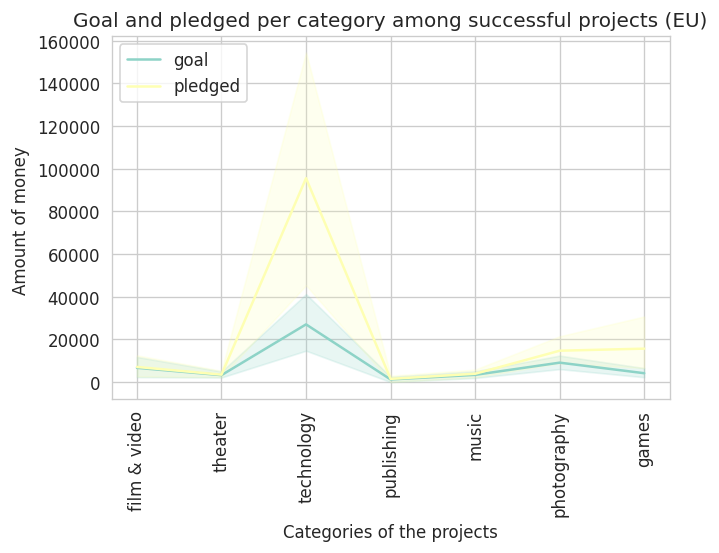

In [186]:
plt.figure(dpi=120)
sns.lineplot(data=kick_df_goal, x= kick_df_goal.Category, y=kick_df_goal.goal)
sns.lineplot(data=kick_df_goal, x= kick_df_goal.Category, y=kick_df_goal.pledged)
plt.title("Goal and pledged per category among successful projects (EU)", fontsize=12)
plt.xlabel("Categories of the projects")
plt.ylabel("Amount of money ")
plt.xticks(rotation = 90)
plt.legend(['goal', 'pledged'], loc='upper left')
plt.show()

When we look at only succesful projects per category, technology is pledging in average much more money, that their goal and than other categories.

Now we know that **Theater** was the most successful campaign *category* in Europe by num. of successful campaigns, let's see the top *sub category* of Theater

In [187]:
eu_succ_ks_cat =  eu_success_ks[eu_success_ks['Category'] == 'theater']


In [188]:
eu_succ_ks_sub_cat_val = eu_succ_ks_cat['Sub-Category'].value_counts()
eu_succ_ks_sub_cat_val

plays      253
spaces      14
musical     10
Name: Sub-Category, dtype: int64

**Plays** is the most successful sub category of KS campaigns in Theater in Europe


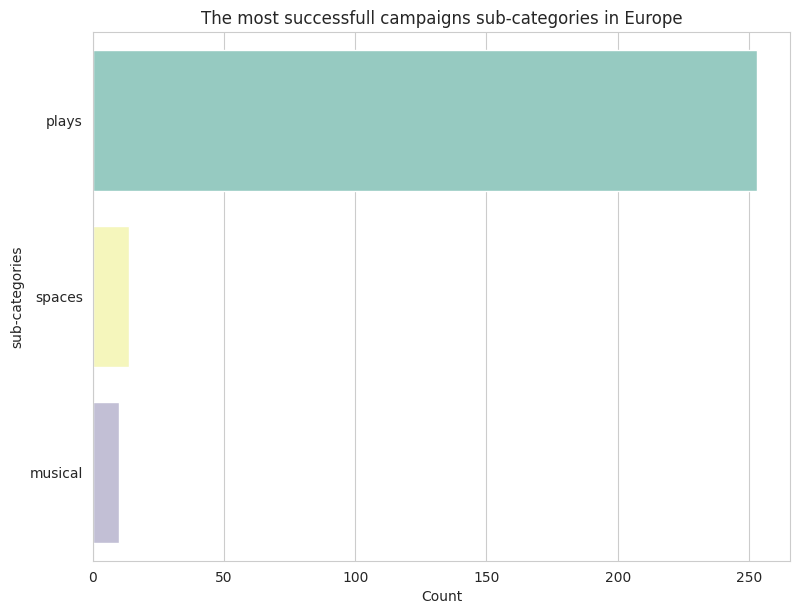

In [189]:
# Most successful category of KS campaigns in EU
plt.figure(figsize=(9,7),dpi=100)
eu_succ_ks_cat = eu_succ_ks_cat['Sub-Category'].value_counts()
sns.barplot(x=eu_succ_ks_sub_cat_val,y=eu_succ_ks_cat.index)

plt.xlabel('Count')
plt.ylabel('sub-categories')
plt.title('The most successfull campaigns sub-categories in Europe');

In [190]:
eu_succ_ks_cat2 = eu_success_ks[eu_success_ks['Category'] == 'technology']


In [191]:
eu_succ_ks_sub_cat2_val = eu_succ_ks_cat2['Sub-Category'].value_counts()
eu_succ_ks_sub_cat2_val

hardware             33
space exploration     6
wearables             2
Name: Sub-Category, dtype: int64

**Hardware** is the most pleged *sub category* of campaigns in Techonology in Europe 

In [192]:
#success rate vs campaign span days
kick_df_EU = df[(df['Continent'] == 'Europe') & (df['launched year']) & (df['campaign span days']<= 60 )]
project_duration = kick_df_EU.groupby(['campaign span days','state'])['campaign span days'].count().reset_index(name='count')
project_duration["sum_counts"] = project_duration.groupby('campaign span days')['count'].transform('sum')
project_duration["pct"] = project_duration['count']/project_duration["sum_counts"]
project_duration = project_duration[project_duration['state'] == 'successful']
project_duration.head()

,campaign span days,state,count,sum_counts,pct
0,11,successful,1,1,1.0
1,12,successful,1,1,1.0
2,13,successful,2,2,1.0
4,14,successful,9,10,0.9
5,15,successful,2,2,1.0


<Figure size 720x480 with 0 Axes>

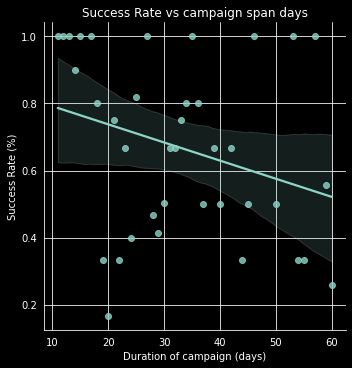

In [193]:
plt.figure(dpi=120)
plt.style.use('dark_background')
sns.lmplot(data=project_duration, x="campaign span days", y="pct")
plt.title("Success Rate vs campaign span days", fontsize=12)
plt.xlabel("Duration of campaign (days)")
plt.ylabel("Success Rate (%)")
plt.show()

We can see there is not clear correlation between success rate and campaign span days, we don’t have the actual duration time. We also need to consider that a lot of projects are only asking for small amount of money, which is easy to get for short duration.

# Lets look at the unsucessful campaigns in Europe

In [194]:
failed_ks = df[df['state'] == 'failed']

In [195]:
failed_ks_eu = failed_ks[failed_ks['Continent'] == 'Europe']


In [196]:
failed_ks_eu

,id,name,blurb,goal,pledged,state,country,currency,deadline,launched_at,staff_pick,backers_count,spotlight,Category and Sub-Category,Continent,quarter,campaign span days,launched year,Category,Sub-Category
165,165,NET,A teacher. A boy. The beach and a heatwave tha...,17000.0,0.0,failed,GB,GBP,2016-01-12 15:48:44,2015-12-13 15:48:44,False,0,False,film & video/drama,Europe,4,30,2015,film & video,drama
169,169,Family,Family is a short film about a father and son ...,2500.0,560.0,failed,GB,GBP,2014-10-18 12:07:39,2014-09-18 12:07:39,False,10,False,film & video/drama,Europe,3,30,2014,film & video,drama
173,173,7 Sins,"This is a film inspired by Quentin Tarantino, ...",1110.0,0.0,failed,GB,GBP,2015-02-28 13:45:08,2015-01-29 13:45:08,False,0,False,film & video/drama,Europe,1,30,2015,film & video,drama
174,174,I Am Forgotten,An international short film project. It is abo...,6000.0,0.0,failed,NL,EUR,2015-05-08 18:12:56,2015-03-09 18:12:56,False,0,False,film & video/drama,Europe,1,60,2015,film & video,drama
175,175,Gooseberry Fool - Feature Film,To heal her scars Olivia must take a journey b...,20000.0,1297.0,failed,GB,GBP,2014-08-29 18:40:11,2014-08-04 18:40:11,False,26,False,film & video/drama,Europe,3,25,2014,film & video,drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4096,4096,"Theatre for Life, Youth Theatre Company, South...",Theatre for Life believes in unlocking young p...,3500.0,400.0,failed,GB,GBP,2017-02-28 08:51:00,2017-01-15 12:43:39,False,5,False,theater/plays,Europe,1,43,2017,theater,plays
4097,4097,And There Was War! Major Theatre Production,"And There Was War is a play, a biblical narrat...",10000.0,0.0,failed,GB,GBP,2016-01-31 23:55:00,2015-12-06 19:47:17,False,0,False,theater/plays,Europe,4,56,2015,theater,plays
4109,4109,Jack the Lad,Jack the Lad - a new play that explores how fa...,500.0,0.0,failed,GB,GBP,2015-11-29 13:56:44,2015-10-30 12:56:44,False,0,False,theater/plays,Europe,4,30,2015,theater,plays
4110,4110,Take Tartuffe to Edinburgh Fringe Festival!,"Set in the height of sex, drugs and rock 'n' r...",300.0,86.0,failed,GB,GBP,2016-07-21 15:02:31,2016-05-22 15:02:31,False,6,False,theater/plays,Europe,2,60,2016,theater,plays


In [197]:
fail_cat_eu = failed_ks_eu['Category'].value_counts()
fail_cat_eu

theater         110
technology       52
film & video     37
photography      34
games            29
publishing       28
food             14
music             9
Name: Category, dtype: int64

Text(0.5, 1.0, 'Failed campaings by category in EU ')

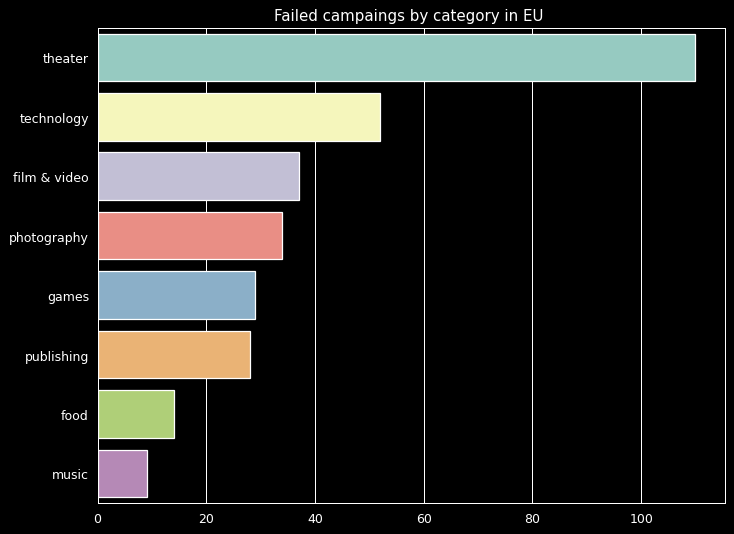

In [198]:
# Lets see the category of campaigns failed in eu

plt.figure(figsize=(9,7),dpi=90)

sns.barplot(x=fail_cat_eu.values,y=fail_cat_eu.index)
plt.title('Failed campaings by category in EU ')

In [199]:
#lets see in which quarter most failed projects were found
failed_ks_eu['quarter'].value_counts()

2    94
1    77
4    74
3    68
Name: quarter, dtype: int64

In [200]:
failed_ks_eu['country'].value_counts().sort_values(ascending=False)[0:5]  #Top 5 countries in EU of failed ks

GB    205
DE     27
IT     19
NL     14
FR     10
Name: country, dtype: int64

# Lets analyze the data of rest of the world - other than eu

In [201]:
rest_of_world = df[df['Continent'] != 'Europe']

In [202]:
rest_of_world['Continent']

0       North America
1       North America
3       North America
4       North America
5       North America
            ...      
4106    North America
4107    North America
4108    North America
4111    North America
4113    North America
Name: Continent, Length: 3285, dtype: object

Text(0.5, 1.0, 'Successful and failed campaigns by category for non European')

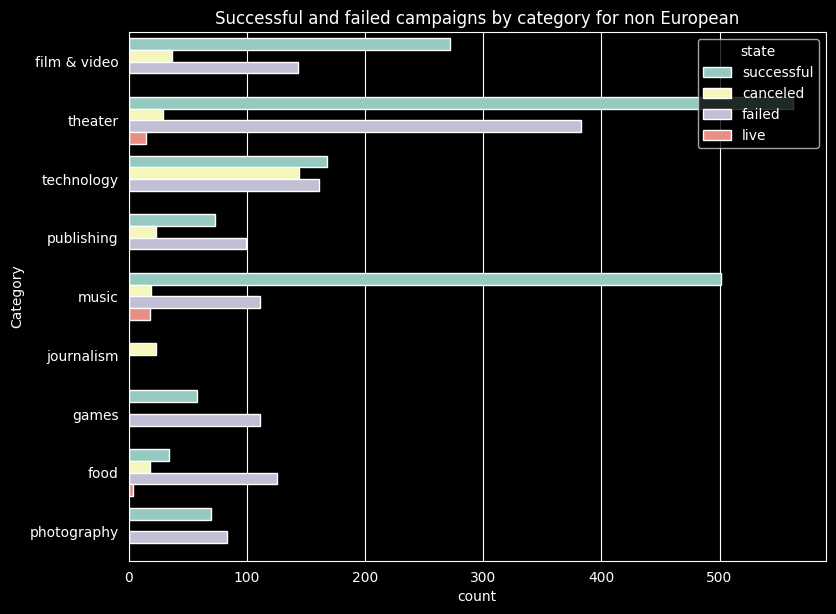

In [203]:
plt.figure(figsize=(9,7),dpi=100)

sns.countplot(data = rest_of_world, y='Category',hue='state')

plt.title('Successful and failed campaigns by category for non European')

From the above plot we can see that for the rest of the world the most successfull ks campaign category was also theater






















































































































































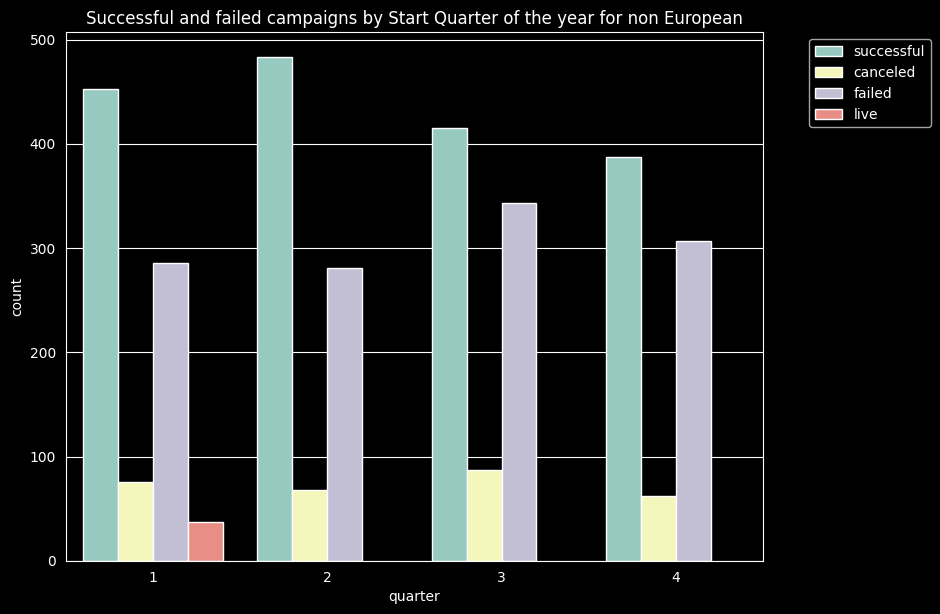

In [204]:
plt.figure(figsize=(9,7),dpi=100)

sns.countplot(data = rest_of_world, x='quarter',hue='state')

plt.title('Successful and failed campaigns by Start Quarter of the year for non European')

plt.legend(bbox_to_anchor=(1.25,1))